# PCA & LDA on MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import pandas as pd

## 1. Train KNN on MNIST Dataset

In [3]:
train_data = datasets.MNIST(root = './data/02/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data/02/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

100%|██████████| 9912422/9912422 [00:00<00:00, 47547267.69it/s]


Extracting ./data/02/MNIST/raw/train-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 45352187.88it/s]


Extracting ./data/02/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29925191.89it/s]


Extracting ./data/02/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4840073.37it/s]


Extracting ./data/02/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/02/MNIST/raw

number of training data :  60000
number of test data :  10000


In [4]:
# 데이터 모양 확인을 위해 dataframe 형태로 변환

feat_cols = ['pixel'+str(i) for i in range(784)]
df_train = pd.DataFrame(train_data.data.reshape(60000,-1).numpy(), columns = feat_cols)
df_test = pd.DataFrame(test_data.data.reshape(10000,-1).numpy(), columns = feat_cols)

df_train.shape, df_test.shape

((60000, 784), (10000, 784))

In [5]:
df_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

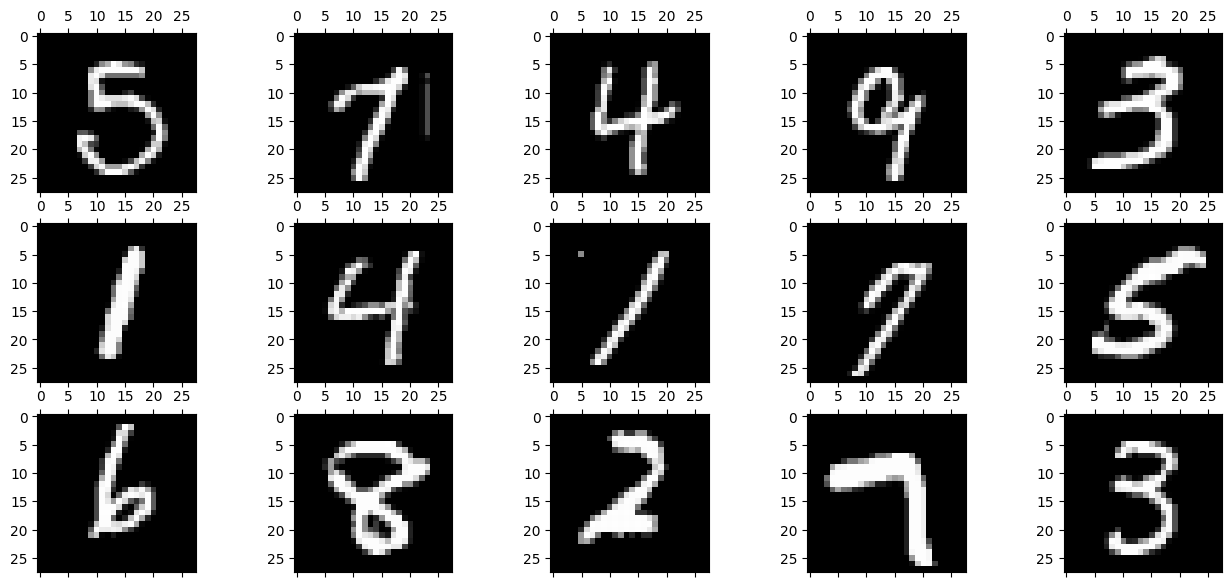

In [7]:
# 데이터 형태 시각화
import numpy as np
import matplotlib.pyplot as plt


rndperm = np.random.permutation(df_train.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df_train.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [8]:
# 학습 데이터 준비
import numpy as np

X_train = train_data.data.reshape(60000,-1).numpy()
y_train = train_data.targets.numpy()

X_test = test_data.data.reshape(10000,-1).numpy()
y_test = test_data.targets.numpy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [9]:
# KNN 학습 - Baseline

from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.013630390167236328


In [10]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  51.62370562553406
0.9688


## 2. PCA & LDA 적용하기

In [11]:
#PCA 적용
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#PCA 객체 생성 (2개의 주성분 사용)
pca = PCA(n_components=2)

#훈련 데이터와 테스트 데이터에 PCA 적용
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = KNeighborsClassifier(n_neighbors= 5)
clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [12]:
#LDA 적용

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA 객체 생성 (클래스 수 - 1 = 2)
lda = LinearDiscriminantAnalysis(n_components=2)

# 훈련 데이터에 LDA 적용
X_train_lda = lda.fit_transform(X_train, y_train)

#X_test_lda = lda.transform(X_test)

In [13]:
X_train_lda.shape

(60000, 2)

In [14]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995])

## 3. 결과 비교하기

In [15]:
# PCA 결과
start_time = time.time()
pred = clf_pca.predict(X_test_pca)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  0.6030185222625732
0.4242


In [16]:
# LDA 결과
start_time = time.time()
y_pred = lda.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, y_pred))

Fit time :  0.06435108184814453
0.873


## 4. PCA & LDA 장단점 정리하기

####장단점을 자유롭게 적어주세요!

- **PCA**
- 장점:
    - **차원 축소**: 고차원 데이터셋의 차원을 효과적으로 축소하여 계산 복잡성을 줄이고 데이터를 단순화할 수 있다.
    - **시각화와 데이터 이해**: 축소된 차원을 통해 데이터를 시각화하고 분석하기 쉬워지며, 데이터의 구조와 패턴을 이해하는 데 도움을 준다.
    - **잡음 제거**: 주요한 정보를 보존하면서 데이터의 잡음(noise)이나 불필요한 정보를 제거할 수 있다.
    - **데이터 압축**: 데이터 저장 공간을 절약할 수 있으며, 데이터 전송 시간을 단축시킬 수 있다.
  
- 단점:
  - **데이터의 분산만 고려**: PCA는 데이터의 분산을 최대화하는 주성분을 찾지만, 클래스 레이블이나 분류 문제의 최적화를 고려하지 않는다.
  - **선형성**: PCA는 선형 변환을 사용하기 때문에, 비선형 구조를 가진 데이터에는 적합하지 않을 수 있다.
  - **해석의 어려움**: 축소된 차원의 의미를 원래 데이터의 특성과 직접적으로 연관짓기 어려울 수 있다.

- **LDA**
- 장점:
  - **클래스 분리 최적화**: 클래스 간 분산을 최대화하고 클래스 내 분산을 최소화하여, 클래스를 잘 구분할 수 있는 특성을 찾는다.
  - **저차원에서의 효율성**: 특히 차원의 저주(curse of dimensionality) 문제를 해결하는 데 도움이 되며, 저차원에서도 효과적인 분류가 가능하다.
  - **분류기의 성능 향상**: LDA는 차원 축소 과정에서 클래스의 구분 정보를 최대한 보존하기 때문에, 분류 문제에서 더 좋은 성능을 낼 수 있다.
- 단점:
  - **클래스 레이블이 필요**: 지도 학습 방법이기 때문에, LDA를 적용하기 위해서는 클래스 레이블이 필요하다.
  - **선형 가정**: LDA는 데이터가 선형적으로 분리 가능하다는 가정 하에 작동하므로, 복잡한 비선형 구조를 가진 데이터셋에는 적합하지 않을 수 있다.
  - **클래스 분포의 가정**: 각 클래스의 데이터가 정규 분포를 따른다고 가정하지만, 실제 데이터에서 이러한 가정이 항상 만족되지는 않는다.
  - **이진 분류에 최적화**: 다중 클래스 문제에도 적용할 수 있지만, 기본적으로 LDA는 두 클래스 사이의 판별 경계를 최적화하는 방법으로 고안되었습니다. 다중 클래스 문제에서는 클래스 간의 관계가 더 복잡할 수 있으므로, 성능이 다소 저하될 수 있다.